In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df1 = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
print(df.shape)
df.describe()
print(df1.shape)

(42000, 785)
(28000, 784)


Data preparation 

In [4]:
x_train = df.drop(columns= 'label')
y_train = df['label']
x_finalt = df1

In [5]:
print(y_train.head())
print(x_train.head())
y_train.value_counts()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64
   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixe

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [6]:
x_train.isnull().any().sum()
y_train.isnull().any().sum()

0

no null values or no missing pixel values

In [7]:
#minmax scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_trainN = scaler.fit_transform(x_train)
x_testN = scaler.fit_transform(x_finalt)

In [8]:
x_trainN = x_trainN.reshape(-1,28,28,1)
x_testN = x_testN.reshape(-1,28,28,1)
print(x_trainN.shape)

(42000, 28, 28, 1)


In [9]:
#hotencoding the y
y_trainE = pd.get_dummies(y_train)
y_trainE.head()

,0,1,2,3,4,5,6,7,8,9
0,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_trainN,y_trainE,test_size = 0.2, random_state=42)

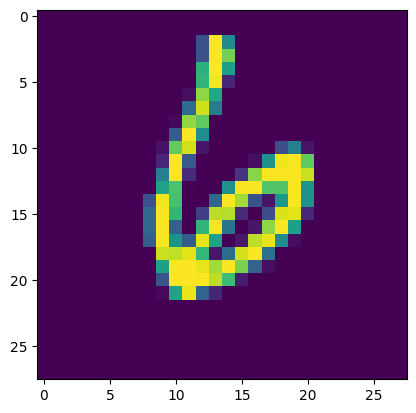

In [11]:
import matplotlib.pyplot as plt
# Some examples
g = plt.imshow(x_train[0][:,:,0])


In [12]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
from keras.optimizers import Adam
model.compile(optimizer =Adam(learning_rate=0.001),loss = "categorical_crossentropy", metrics=["accuracy"])

In [14]:
epochs = 20
batch_size = 86
history=model.fit(x_train,y_train, batch_size=batch_size, epochs = epochs, 
                  validation_data = (x_test,y_test),verbose = 2)
##overfitting?improve with augmentation..

Epoch 1/20
391/391 - 14s - 35ms/step - accuracy: 0.8908 - loss: 0.3534 - val_accuracy: 0.9717 - val_loss: 0.0932
Epoch 2/20
391/391 - 11s - 29ms/step - accuracy: 0.9697 - loss: 0.1006 - val_accuracy: 0.9806 - val_loss: 0.0618
Epoch 3/20
391/391 - 11s - 29ms/step - accuracy: 0.9769 - loss: 0.0743 - val_accuracy: 0.9837 - val_loss: 0.0529
Epoch 4/20
391/391 - 12s - 30ms/step - accuracy: 0.9820 - loss: 0.0582 - val_accuracy: 0.9865 - val_loss: 0.0431
Epoch 5/20
391/391 - 11s - 28ms/step - accuracy: 0.9836 - loss: 0.0501 - val_accuracy: 0.9888 - val_loss: 0.0386
Epoch 6/20
391/391 - 11s - 28ms/step - accuracy: 0.9868 - loss: 0.0416 - val_accuracy: 0.9870 - val_loss: 0.0415
Epoch 7/20
391/391 - 12s - 29ms/step - accuracy: 0.9871 - loss: 0.0392 - val_accuracy: 0.9889 - val_loss: 0.0330
Epoch 8/20
391/391 - 11s - 28ms/step - accuracy: 0.9893 - loss: 0.0332 - val_accuracy: 0.9868 - val_loss: 0.0430
Epoch 9/20
391/391 - 11s - 27ms/step - accuracy: 0.9895 - loss: 0.0317 - val_accuracy: 0.9902 - 

Text(0, 0.5, 'Loss')

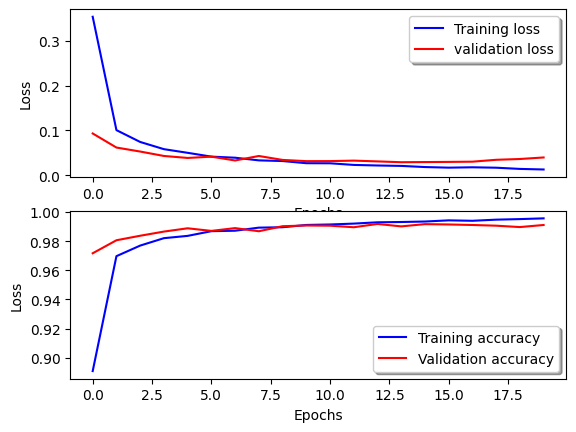

In [15]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss")
legend = ax[0].legend(loc='best', shadow=True)
ax[0].set_xlabel('Epochs')  
ax[0].set_ylabel('Loss') 

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_xlabel('Epochs')  # X-axis label (epochs)
ax[1].set_ylabel('Loss') 

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


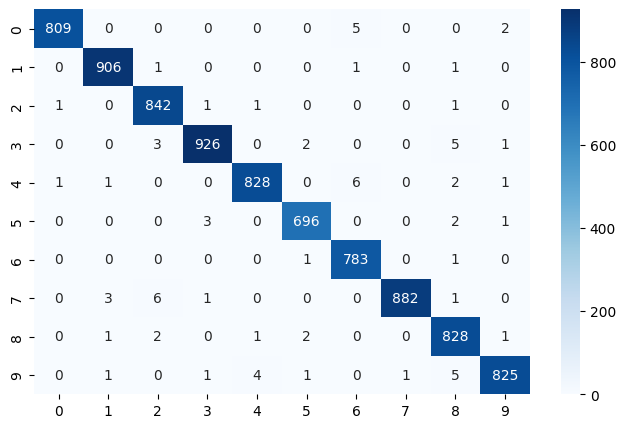

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test)

#convert all to true
Y_pred = np.argmax(y_pred, axis=1)
Y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(Y_true,Y_pred)
#cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True,cmap='Blues',fmt= 'd')
plt.show()

In [17]:

result = model.predict(x_testN)
result = np.argmax(result, axis= 1)

submissions=pd.DataFrame({"ImageId": list(range(1,len(result)+1)),
                         "Label": result})

875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


In [18]:
submissions.to_csv("final.csv", index=False, header=True)